In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset into dataframe-

df=pd.read_csv("Amazon Sale Report.csv")

In [3]:
#Print dataset info-

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Index               128976 non-null  object 
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Unnamed: 3          0 non-null       float64
 4   Delivery Status     128976 non-null  object 
 5   Fulfilment          128976 non-null  object 
 6   Sales Channel       128976 non-null  object 
 7   Ship-Service-Level  128976 non-null  object 
 8   Category            128976 non-null  object 
 9   Size                128976 non-null  object 
 10  Courier Status      128976 non-null  object 
 11  Quantity            128976 non-null  object 
 12  Amount              128976 non-null  float64
 13  Shipping State      128976 non-null  object 
 14  B2B                 128976 non-null  bool   
 15  Fulfilled By        128976 non-nul

In [4]:
#Print first few rows-

df.head()

Index                                           Order ID   Date  \
0  Unspecified  4Unspecified5-8Unspecified78784-573Unspecified545  April   
1  Unspecified  Unspecified7Unspecified-9Unspecified98Unspecif...  April   
2            2  4Unspecified4-Unspecified687676-7273Unspecified46  April   
3            3  4Unspecified3-96Unspecified5377-8Unspecified33...  April   
4            4  4Unspecified7-UnspecifiedUnspecified6979Unspec...  April   

   Unnamed: 3               Delivery Status Fulfilment Sales Channel  \
0         NaN                     Cancelled   Merchant     Amazon.in   
1         NaN  Shipped - Delivered to Buyer   Merchant     Amazon.in   
2         NaN                       Shipped     Amazon     Amazon.in   
3         NaN                     Cancelled   Merchant     Amazon.in   
4         NaN                       Shipped     Amazon     Amazon.in   

  Ship-Service-Level  Category Size Courier Status     Quantity  Amount  \
0           Standard   T-shirt    S     On the Way  Unspecified  647.62   
1           Standard     Shirt  3XL        Shipped  Unspecified    0.00   
2          Expedited     Shirt   XL        Shipped  Unspecified  329.00   
3           Standard   Blazzer    L     On the Way  Unspecified  753.33   
4          Expedited  Trousers  3XL        Shipped  Unspecified  574.00   

  Shipping State    B2B   Fulfilled By  
0    MAHARASHTRA  False      Easy Ship  
1      KARNATAKA  False      Easy Ship  
2    MAHARASHTRA   True  Not Mentioned  
3    PONDICHERRY  False      Easy Ship  
4     TAMIL NADU  False  Not Mentioned

In [5]:
# Drop columns with all null values-
df= df.dropna(axis=1, how='all')

# Drop 'Order ID' and 'Index' columns
df = df.drop(columns=['Order ID', 'Index'])

# Rename 'Date' column to 'Month'
df = df.rename(columns={'Date': 'Month'})


In [6]:
#Check if null columns are present again-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Month               128976 non-null  object 
 1   Delivery Status     128976 non-null  object 
 2   Fulfilment          128976 non-null  object 
 3   Sales Channel       128976 non-null  object 
 4   Ship-Service-Level  128976 non-null  object 
 5   Category            128976 non-null  object 
 6   Size                128976 non-null  object 
 7   Courier Status      128976 non-null  object 
 8   Quantity            128976 non-null  object 
 9   Amount              128976 non-null  float64
 10  Shipping State      128976 non-null  object 
 11  B2B                 128976 non-null  bool   
 12  Fulfilled By        128976 non-null  object 
dtypes: bool(1), float64(1), object(11)
memory usage: 11.9+ MB


In [7]:
#Statistical Analysis-

# Set the month order for proper sorting-
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Group by month and calculate average, median, and mode for 'Amount'
average_amount = df.groupby('Month')['Amount'].mean()
median_amount = df.groupby('Month')['Amount'].median()
mode_amount = df.groupby('Month')['Amount'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Combine results into a single DataFrame for easy comparison
summary_stats = pd.DataFrame({
    'Average': average_amount,
    'Median': median_amount,
    'Mode': mode_amount
})

print(summary_stats)


              Average  Median   Mode
Month                               
January           NaN     NaN    NaN
February          NaN     NaN    NaN
March      424.026667   453.0  449.0
April      394.570063   399.0    0.0
May        394.354098   399.0   77.0
June       388.183552   399.0    0.0
July              NaN     NaN    NaN
August            NaN     NaN    NaN
September         NaN     NaN    NaN
October           NaN     NaN    NaN
November          NaN     NaN    NaN
December          NaN     NaN    NaN


C:\Users\Mizzy\AppData\Local\Temp\ipykernel_73808\3685140463.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_amount = df.groupby('Month')['Amount'].mean()
C:\Users\Mizzy\AppData\Local\Temp\ipykernel_73808\3685140463.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_amount = df.groupby('Month')['Amount'].median()
C:\Users\Mizzy\AppData\Local\Temp\ipykernel_73808\3685140463.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

C:\Users\Mizzy\AppData\Local\Temp\ipykernel_73808\3314769210.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('Month')['Amount'].sum()


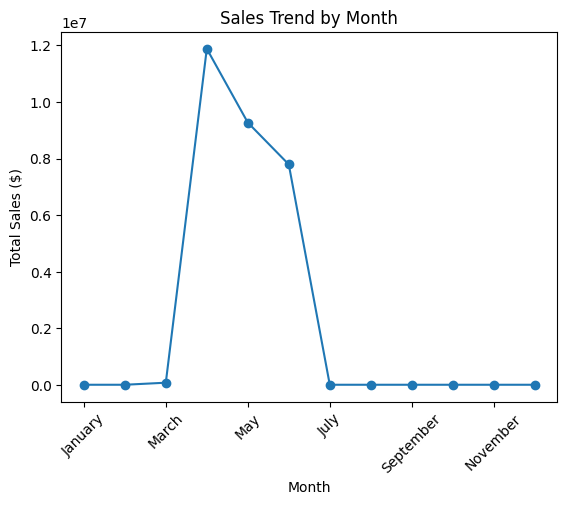

In [8]:
#Sales Overview: Analyzing Trends Over Time-

# Set the month order-
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Convert 'Month' column to a categorical type with the specified order-
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Aggregate sales by month-
monthly_sales = df.groupby('Month')['Amount'].sum()

# Plotting the trend-
monthly_sales.plot(kind='line', marker='o', title='Sales Trend by Month', ylabel='Total Sales ($)')
plt.xticks(rotation=45)
plt.show()


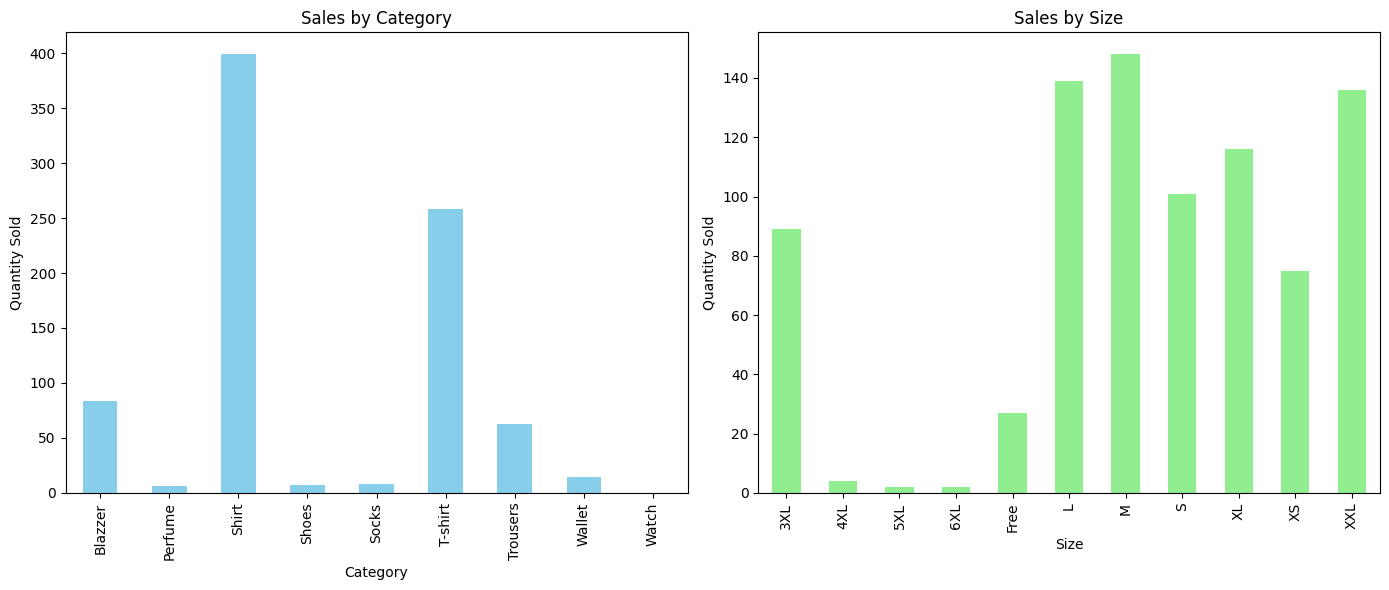

In [9]:
#Product Analysis: Category, Size, and Quantity-

# Ensure 'Quantity' column is numeric for aggregation-
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Calculate total quantity sold by Category and Size-
category_sales = df.groupby('Category')['Quantity'].sum()
size_sales = df.groupby('Size')['Quantity'].sum()

# Plotting Category and Size Analysis-
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
category_sales.plot(kind='bar', ax=ax[0], title='Sales by Category', ylabel='Quantity Sold', color='skyblue')
size_sales.plot(kind='bar', ax=ax[1], title='Sales by Size', ylabel='Quantity Sold', color='lightgreen')
plt.tight_layout()
plt.show()


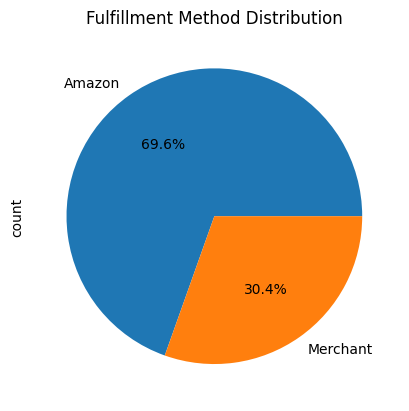

In [10]:
#Fulfillment Analysis: Analyzing Fulfillment Methods-

# Distribution of Fulfillment Methods-
fulfillment_counts = df['Fulfilment'].value_counts()

# Plotting fulfillment methods-
fulfillment_counts.plot(kind='pie', autopct='%1.1f%%', title='Fulfillment Method Distribution')
plt.show()


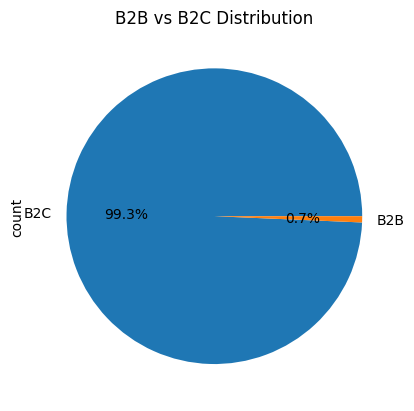

In [11]:
#Customer Segmentation: B2B and B2C-

# B2B vs B2C Distribution-
b2b_counts = df['B2B'].value_counts()

# Plotting B2B vs B2C Distribution-
b2b_counts.plot(kind='pie', labels=['B2C', 'B2B'], autopct='%1.1f%%', title='B2B vs B2C Distribution')
plt.show()

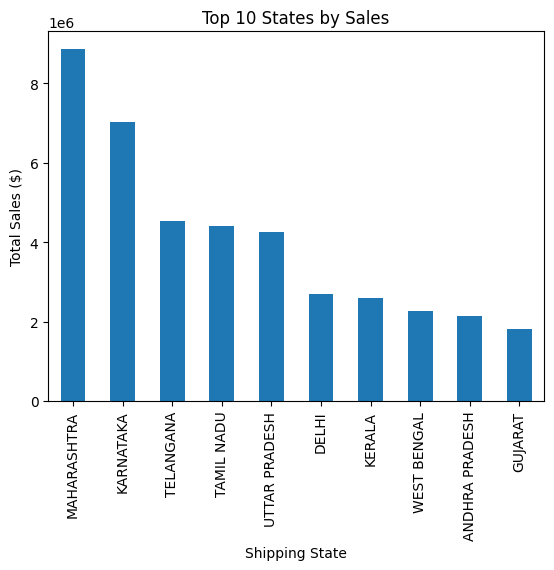

In [12]:
#Geographical Analysis-

# Sales by state-
state_sales = df.groupby('Shipping State')['Amount'].sum().sort_values(ascending=False)

# Plot top states by sales-
state_sales.head(10).plot(kind='bar', title='Top 10 States by Sales', ylabel='Total Sales ($)')
plt.show()

C:\Users\Mizzy\AppData\Local\Temp\ipykernel_73808\2484964356.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Delivery Status', y='Amount', data=df, estimator=sum, ci=None)


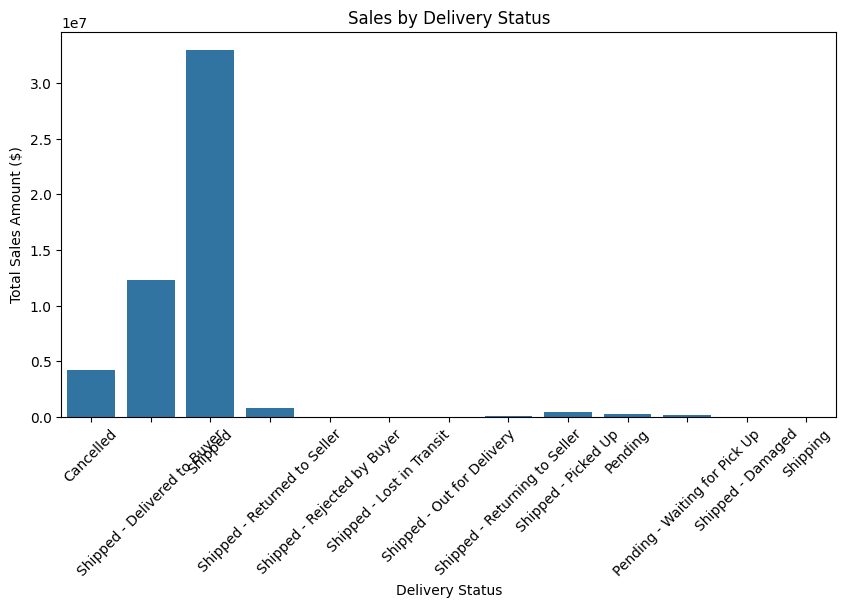

In [13]:
# Sales by Delivery Status-

plt.figure(figsize=(10, 5))
sns.barplot(x='Delivery Status', y='Amount', data=df, estimator=sum, ci=None)
plt.title('Sales by Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Total Sales Amount ($)')
plt.xticks(rotation=45)
plt.show()


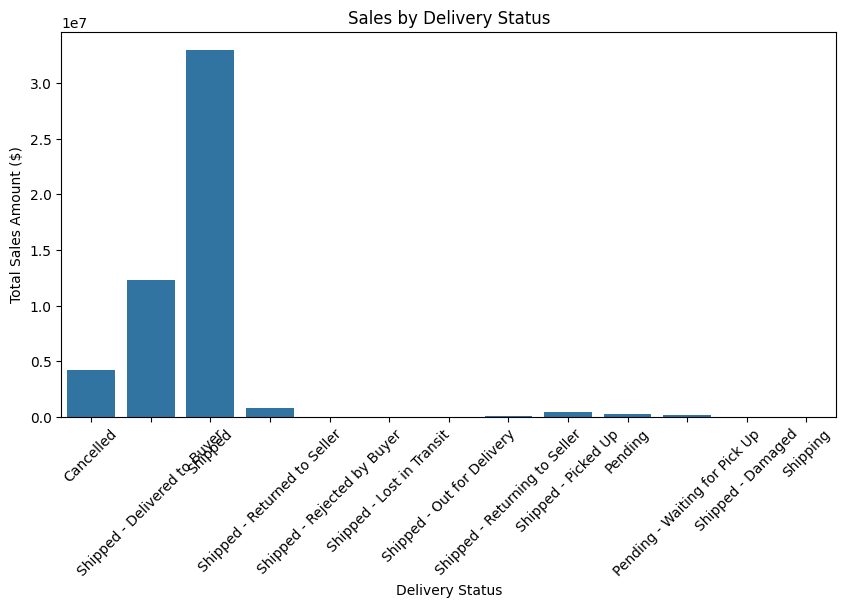

In [34]:
# Sales by Delivery Status-

plt.figure(figsize=(10, 5))
sns.barplot(x='Delivery Status', y='Amount', data=df, estimator=sum, errorbar=None)
plt.title('Sales by Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Total Sales Amount ($)')
plt.xticks(rotation=45)
plt.show()


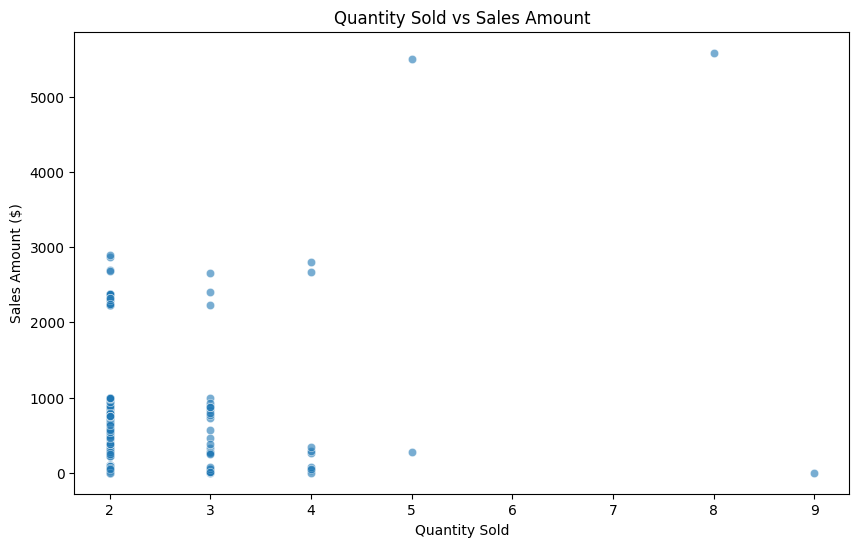

In [38]:
# Plot Quantity vs. Amount to see the relationship between them-

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Amount', data=df, alpha=0.6)
plt.title('Quantity Sold vs Sales Amount')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Amount ($)')
plt.show()


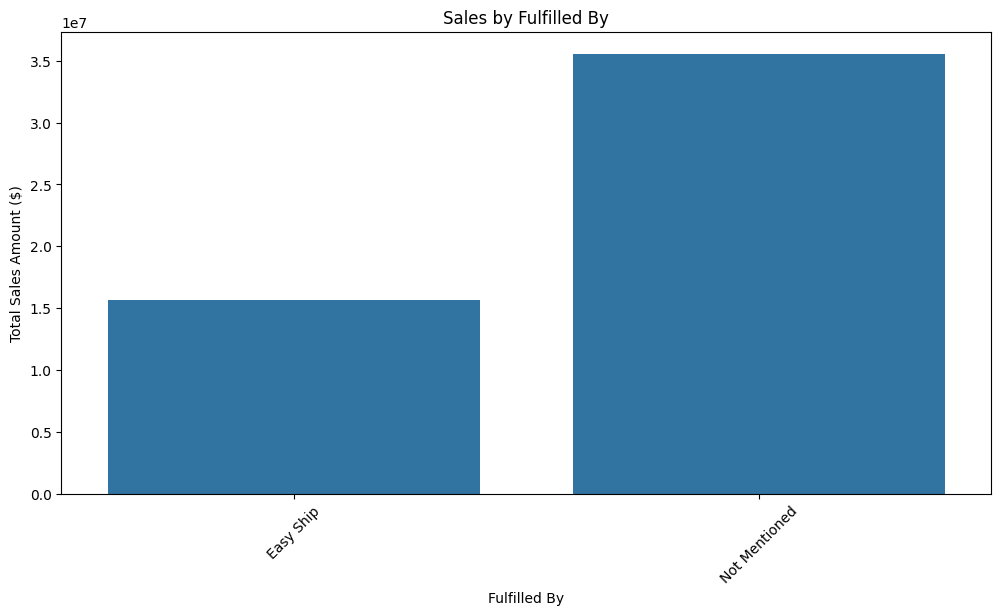

In [40]:
# Sales vs. Fulfillment-

plt.figure(figsize=(12, 6))
sns.barplot(x='Fulfilled By', y='Amount', data=df, estimator=sum, errorbar=None)
plt.title('Sales by Fulfilled By')
plt.xlabel('Fulfilled By')
plt.ylabel('Total Sales Amount ($)')
plt.xticks(rotation=45)
plt.show()
